In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [8]:
original_image = cv2.imread('mollahoseini-karimi.jpg')
original_image = original_image[:,:256]
img = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)


In [9]:
vectorized = img.reshape((-1, 3))
vectorized = np.float32(vectorized)


In [45]:
color[:2]

array([[  0,   0, 255],
       [255,   0, 255]])

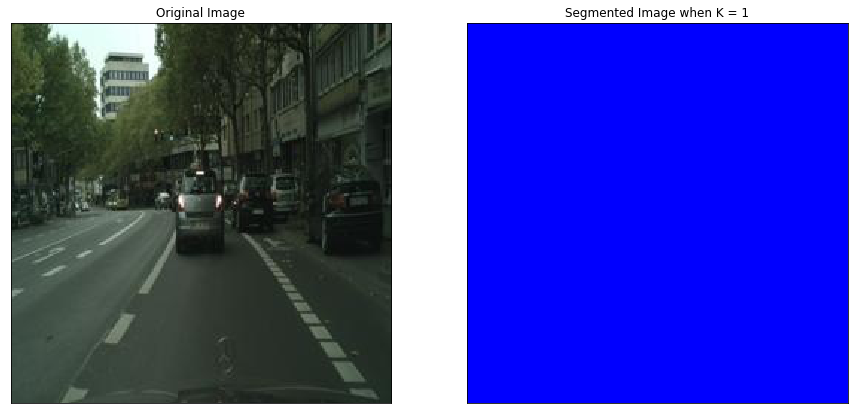

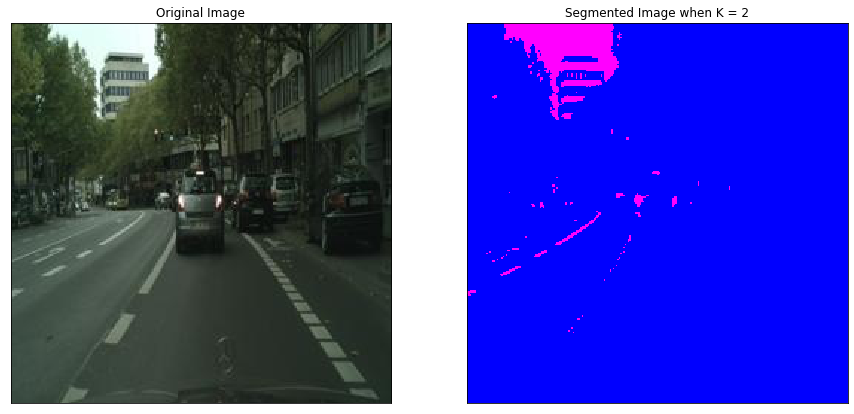

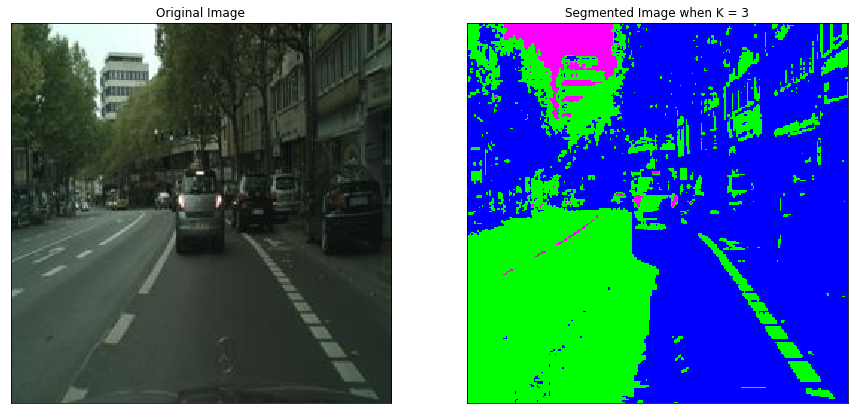

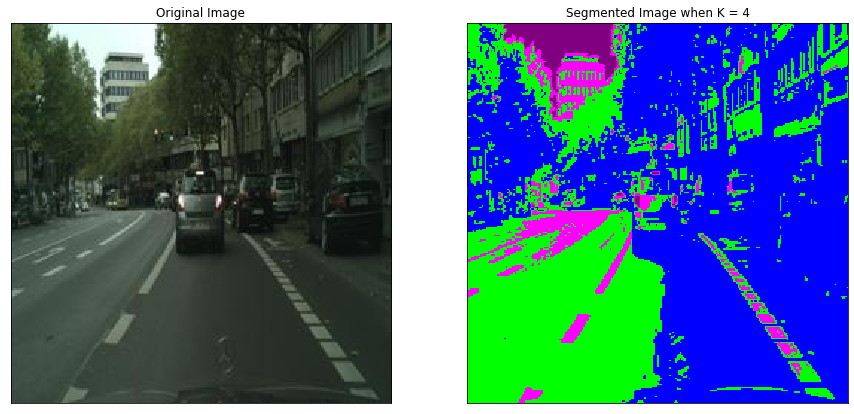

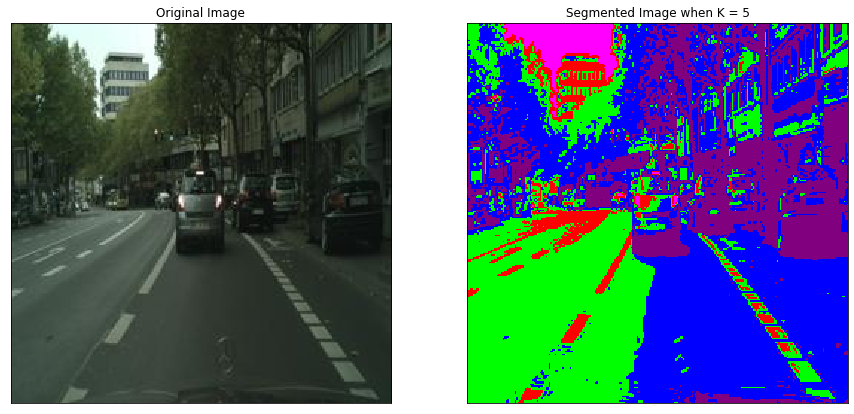

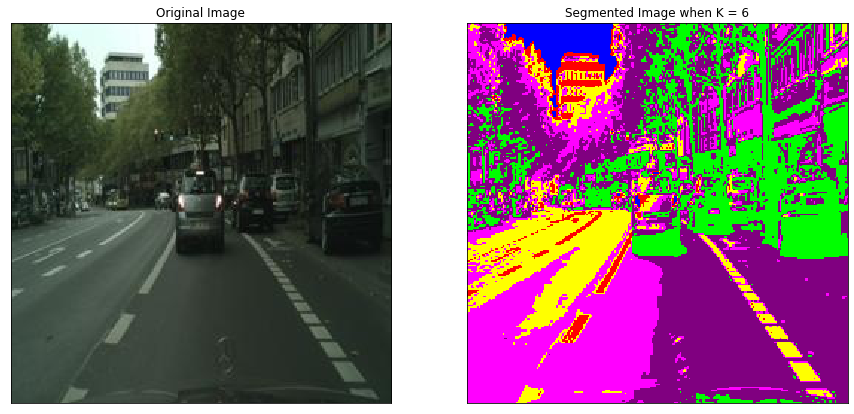

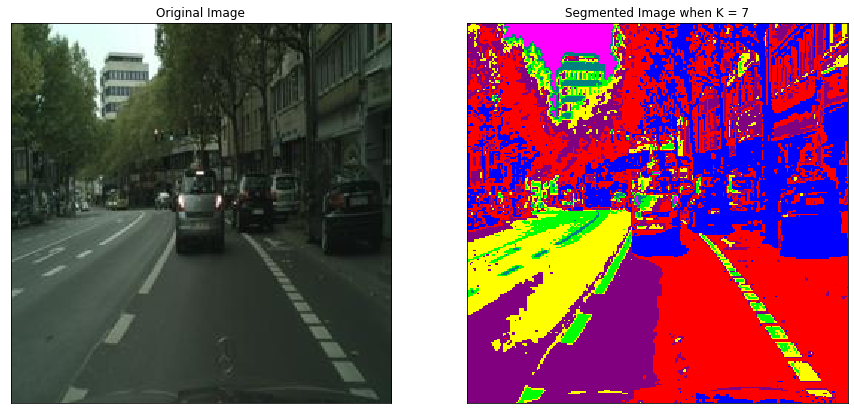

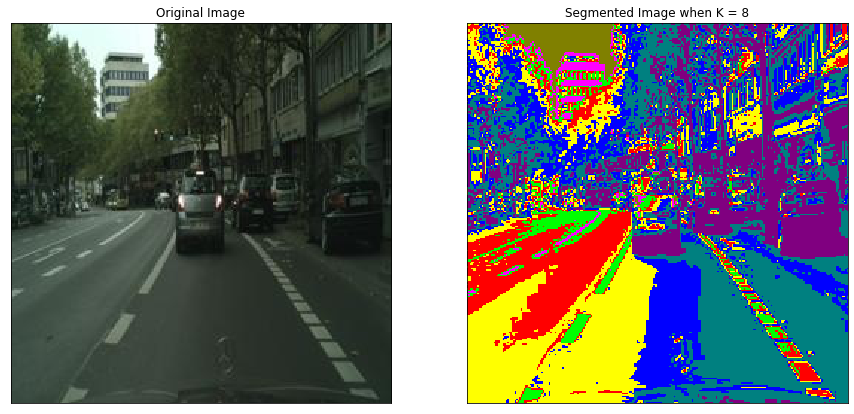

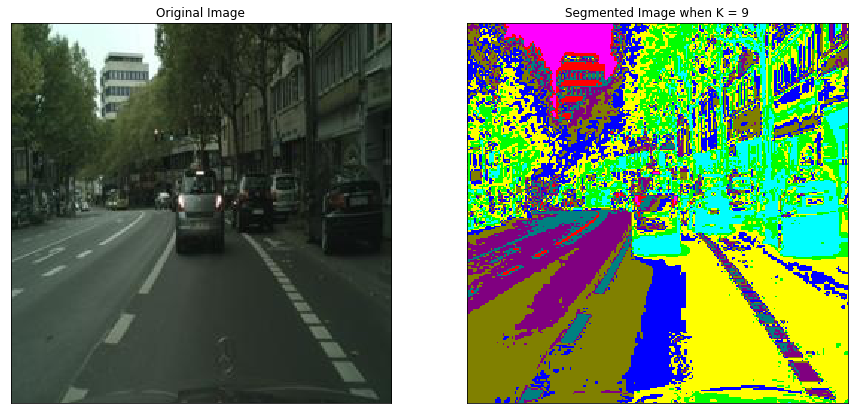

In [49]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10
figure_size = 15
squared_distances = []
color = np.array([[0,0,255],[255,0,255],[0,255,0],[128,0,128],[255,0,0],[255,255,0],[0,128,128],[128,128,0],[0,255,255],[0,0,0]])
for K in range(1, 10):
    ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    squared_distances.append(ret)
    center = np.uint8(center)
    center= color[:K]
    #center = center + 50   
    
    res = center[label.flatten()]
    result_image = res.reshape((img.shape))
    
    
    
    plt.figure(figsize=(figure_size,figure_size))
    plt.subplot(1,2,1),plt.imshow(img)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2),plt.imshow(result_image)
    plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
    plt.show()

In [35]:
center=center+50

In [36]:
  
    center

array([[ 49,  50,  50],
       [ 50,  50,  49],
       [ 50,  49,  50],
       [113, 126, 112],
       [129, 143, 130],
       [ 89,  98,  88],
       [ 67,  73,  67],
       [155, 169, 155],
       [101, 111,  97]], dtype=uint8)

In [24]:
label.flatten()

array([2, 3, 3, ..., 0, 0, 0], dtype=int32)

In [27]:
center[0]=[1,0,0]

In [28]:
center

array([[  1,   0,   0],
       [232, 251, 246],
       [ 82,  96,  82],
       [ 64,  77,  64],
       [ 52,  62,  47],
       [155, 171, 156],
       [ 17,  23,  17],
       [109, 124, 110],
       [ 39,  48,  38]], dtype=uint8)

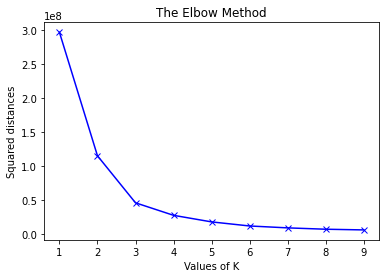

In [5]:
plt.plot(range(1, 10), squared_distances, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Squared distances')
plt.title('The Elbow Method')
plt.show()

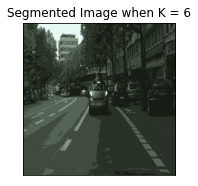